# EWM(지수이동평균) 직접 만들기


In [3]:
import FinanceDataReader as fdr

df = fdr.DataReader("005930", start="2021")

df["Close"]

Date
2021-01-04     83000
2021-01-05     83900
2021-01-06     82200
2021-01-07     82900
2021-01-08     88800
               ...  
2026-01-26    152100
2026-01-27    159500
2026-01-28    162400
2026-01-29    160700
2026-01-30    160500
Name: Close, Length: 1246, dtype: int64

In [8]:
df = df[["Close"]]
df

,Close
Date,
2021-01-04,83000
2021-01-05,83900
2021-01-06,82200
2021-01-07,82900
2021-01-08,88800
...,...
2026-01-26,152100
2026-01-27,159500
2026-01-28,162400


In [16]:
N = 9
weight = 2 / (1 + N)
print(weight)

ewm_values = [float(df["Close"].iloc[0])]
for index in range(len(df["EWM"]) - 1):
    val1 = df["Close"].iloc[index + 1] * weight
    val2 = ewm_values[index] * (1 - weight)
    ewm_values.append(val1 + val2)

df["EWM"] = ewm_values
df["EWM"]

0.2


Date
2021-01-04     83000.000000
2021-01-05     83180.000000
2021-01-06     82984.000000
2021-01-07     82967.200000
2021-01-08     84133.760000
                  ...      
2026-01-26    147786.451998
2026-01-27    150129.161598
2026-01-28    152583.329278
2026-01-29    154206.663423
2026-01-30    155465.330738
Name: EWM, Length: 1246, dtype: float64

In [17]:
def ewm_fn(df, window):
    df = df.copy()

    weight = 2 / (1 + window)

    ewm_values = [float(df["Close"].iloc[0])]
    for index in range(len(df["EWM"]) - 1):
        val1 = df["Close"].iloc[index + 1] * weight
        val2 = ewm_values[index] * (1 - weight)
        ewm_values.append(val1 + val2)

    df["EWM"] = ewm_values
    return df[["EWM"]]

In [18]:
df_ewm = ewm_fn(df, window=9)
df_ewm

,EWM
Date,
2021-01-04,83000.000000
2021-01-05,83180.000000
2021-01-06,82984.000000
2021-01-07,82967.200000
2021-01-08,84133.760000
...,...
2026-01-26,147786.451998
2026-01-27,150129.161598
2026-01-28,152583.329278


# EWM(지수이동평균)\_pandas.DataFrame.ewm


In [ ]:
import FinanceDataReader as fdr

df = fdr.DataReader("005930", start="2021")
df = df[["Close"]]  # 데이터 프레임으로 만들어주기 위해
df

,Close
Date,
2021-01-04,83000
2021-01-05,83900
2021-01-06,82200
2021-01-07,82900
2021-01-08,88800
...,...
2026-01-28,162400
2026-01-29,160700
2026-01-30,160500


In [5]:
short_N = 9
long_N = 26
signal_N = 13

df["Short"] = df["Close"].ewm(span=short_N, adjust=False).mean()  # 지수이동평균
df["Long"] = df["Close"].ewm(span=long_N, adjust=False).mean()
df["MACD"] = df["Short"] - df["Long"]
df["Signal"] = df["MACD"].ewm(span=signal_N, adjust=False).mean()
df["MACD Oscillator"] = df["MACD"] - df["Signal"]
df

,Close,Short,Long,MACD,Signal,MACD Oscillator
Date,,,,,,
2021-01-04,83000,83000.000000,83000.000000,0.000000,0.000000,0.000000
2021-01-05,83900,83180.000000,83066.666667,113.333333,16.190476,97.142857
2021-01-06,82200,82984.000000,83002.469136,-18.469136,11.239103,-29.708239
2021-01-07,82900,82967.200000,82994.878829,-27.678829,5.679398,-33.358228
2021-01-08,88800,84133.760000,83424.887805,708.872195,106.135512,602.736683
...,...,...,...,...,...,...
2026-01-28,162400,152583.329278,139006.214867,13577.114411,12200.497907,1376.616505
2026-01-29,160700,154206.663423,140613.161914,13593.501509,12399.498421,1194.003087
2026-01-30,160500,155465.330738,142086.261032,13379.069707,12539.437176,839.632530


# macdOscillator_fn 함수만들기


In [1]:
import FinanceDataReader as fdr

df = fdr.DataReader("005930", start="2021")
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,0.024691
2021-01-05,81600,83900,81600,83900,35335669,0.010843
2021-01-06,83300,84500,82100,82200,42089013,-0.020262
2021-01-07,82800,84200,82700,82900,32644642,0.008516
2021-01-08,83300,90000,83000,88800,59013307,0.071170
...,...,...,...,...,...,...
2026-01-29,166200,166600,157100,160700,36087223,-0.010468
2026-01-30,160100,166500,160100,160500,40557267,-0.001245
2026-02-02,155700,159600,150400,150400,39748369,-0.062928


In [2]:
def macdOscillator_fn(df, short_N, long_N, signal_N):
    df = df[["Close"]].copy()

    df["Short"] = df["Close"].ewm(span=short_N, adjust=False).mean()
    df["Long"] = df["Close"].ewm(span=long_N, adjust=False).mean()
    df["MACD"] = df["Short"] - df["Long"]
    df["Signal"] = df["MACD"].ewm(span=signal_N, adjust=False).mean()
    df["MACD Oscillator"] = df["MACD"] - df["Signal"]

    return df[["MACD", "Signal", "MACD Oscillator"]]

In [3]:
df_macd_oscillator = macdOscillator_fn(df, short_N=9, long_N=26, signal_N=13)
df_macd_oscillator

,MACD,Signal,MACD Oscillator
Date,,,
2021-01-04,0.000000,0.000000,0.000000
2021-01-05,113.333333,16.190476,97.142857
2021-01-06,-18.469136,11.239103,-29.708239
2021-01-07,-27.678829,5.679398,-33.358228
2021-01-08,708.872195,106.135512,602.736683
...,...,...,...
2026-01-29,13593.501509,12399.498421,1194.003087
2026-01-30,13379.069707,12539.437176,839.632530
2026-02-02,11750.171043,12426.684871,-676.513829


# 일별수익률 & 누적수익률


In [13]:
import FinanceDataReader as fdr

df = fdr.DataReader("035420", start="2021")
df = df[["Close"]]
df

,Close
Date,
2021-01-04,293000
2021-01-05,292500
2021-01-06,290000
2021-01-07,289500
2021-01-08,312000
...,...
2026-02-02,268000
2026-02-03,269000
2026-02-04,264500


In [2]:
df["Close"].shift(1)

Date
2021-01-04         NaN
2021-01-05    293000.0
2021-01-06    292500.0
2021-01-07    290000.0
2021-01-08    289500.0
                ...   
2026-02-02    275000.0
2026-02-03    268000.0
2026-02-04    269000.0
2026-02-05    264500.0
2026-02-06    257000.0
Name: Close, Length: 1251, dtype: float64

In [3]:
# 수익률 계산
((df["Close"] - df["Close"].shift(1)) / df["Close"].shift(1)).fillna(0)

Date
2021-01-04    0.000000
2021-01-05   -0.001706
2021-01-06   -0.008547
2021-01-07   -0.001724
2021-01-08    0.077720
                ...   
2026-02-02   -0.025455
2026-02-03    0.003731
2026-02-04   -0.016729
2026-02-05   -0.028355
2026-02-06   -0.031128
Name: Close, Length: 1251, dtype: float64

In [4]:
# 수익률 함수화
def return_fn(df):
    return df["Close"].pct_change().fillna(0)


df_return = return_fn(df)
df_return

Date
2021-01-04    0.000000
2021-01-05   -0.001706
2021-01-06   -0.008547
2021-01-07   -0.001724
2021-01-08    0.077720
                ...   
2026-02-02   -0.025455
2026-02-03    0.003731
2026-02-04   -0.016729
2026-02-05   -0.028355
2026-02-06   -0.031128
Name: Close, Length: 1251, dtype: float64

In [5]:
df_return + 1

Date
2021-01-04    1.000000
2021-01-05    0.998294
2021-01-06    0.991453
2021-01-07    0.998276
2021-01-08    1.077720
                ...   
2026-02-02    0.974545
2026-02-03    1.003731
2026-02-04    0.983271
2026-02-05    0.971645
2026-02-06    0.968872
Name: Close, Length: 1251, dtype: float64

In [6]:
def cum_return_fn(df_return):
    return (1 + df_return).cumprod()


df_cum_return = cum_return_fn(df_return)
df_cum_return - 1

Date
2021-01-04    0.000000
2021-01-05   -0.001706
2021-01-06   -0.010239
2021-01-07   -0.011945
2021-01-08    0.064846
                ...   
2026-02-02   -0.085324
2026-02-03   -0.081911
2026-02-04   -0.097270
2026-02-05   -0.122867
2026-02-06   -0.150171
Name: Close, Length: 1251, dtype: float64

In [30]:
import FinanceDataReader as fdr

df = fdr.DataReader("035420", start="2021")
df = df[["Close"]]
df

,Close
Date,
2021-01-04,293000
2021-01-05,292500
2021-01-06,290000
2021-01-07,289500
2021-01-08,312000
...,...
2026-02-02,268000
2026-02-03,269000
2026-02-04,264500


In [31]:
df["Return"] = return_fn(df)
df

,Close,Return
Date,,
2021-01-04,293000,0.000000
2021-01-05,292500,-0.001706
2021-01-06,290000,-0.008547
2021-01-07,289500,-0.001724
2021-01-08,312000,0.077720
...,...,...
2026-02-02,268000,-0.025455
2026-02-03,269000,0.003731
2026-02-04,264500,-0.016729


In [32]:
df["CumReturn"] = cum_return_fn(df["Return"])
df

,Close,Return,CumReturn
Date,,,
2021-01-04,293000,0.000000,1.000000
2021-01-05,292500,-0.001706,0.998294
2021-01-06,290000,-0.008547,0.989761
2021-01-07,289500,-0.001724,0.988055
2021-01-08,312000,0.077720,1.064846
...,...,...,...
2026-02-02,268000,-0.025455,0.914676
2026-02-03,269000,0.003731,0.918089
2026-02-04,264500,-0.016729,0.902730


In [33]:
df["MaxCumReturn"] = df[
    "CumReturn"
].cummax()  # CumReturn을 진행하는 과정에서 가장 높았던 값
df

,Close,Return,CumReturn,MaxCumReturn
Date,,,,
2021-01-04,293000,0.000000,1.000000,1.000000
2021-01-05,292500,-0.001706,0.998294,1.000000
2021-01-06,290000,-0.008547,0.989761,1.000000
2021-01-07,289500,-0.001724,0.988055,1.000000
2021-01-08,312000,0.077720,1.064846,1.064846
...,...,...,...,...
2026-02-02,268000,-0.025455,0.914676,1.549488
2026-02-03,269000,0.003731,0.918089,1.549488
2026-02-04,264500,-0.016729,0.902730,1.549488


In [34]:
df["DrawDown"] = (df["CumReturn"] / df["MaxCumReturn"]) - 1
df

,Close,Return,CumReturn,MaxCumReturn,DrawDown
Date,,,,,
2021-01-04,293000,0.000000,1.000000,1.000000,0.000000
2021-01-05,292500,-0.001706,0.998294,1.000000,-0.001706
2021-01-06,290000,-0.008547,0.989761,1.000000,-0.010239
2021-01-07,289500,-0.001724,0.988055,1.000000,-0.011945
2021-01-08,312000,0.077720,1.064846,1.064846,0.000000
...,...,...,...,...,...
2026-02-02,268000,-0.025455,0.914676,1.549488,-0.409692
2026-02-03,269000,0.003731,0.918089,1.549488,-0.407489
2026-02-04,264500,-0.016729,0.902730,1.549488,-0.417401


In [35]:
print(df["DrawDown"].min())

-0.6585903083700438


<Axes: xlabel='Date'>

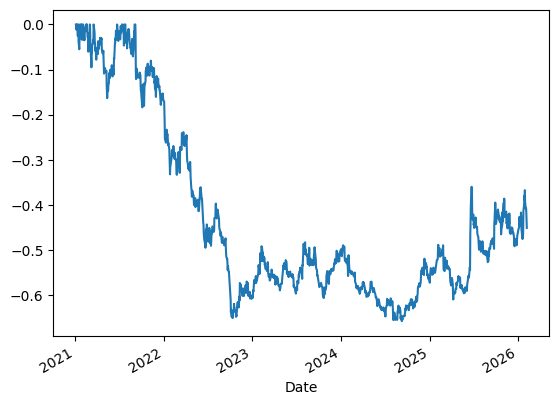

In [36]:
df["DrawDown"].plot()

In [37]:
mdd = df["DrawDown"].min()
mdd

np.float64(-0.6585903083700438)

In [ ]:
# 최저가
min_close_value = df["Close"].min()

# 최저가 날짜: argmin() => 최저가 인덱스 반환
min_date = df.index[df["Close"].argmin()]

# 최고가
max_close_value = df["Close"].max()

# mdd
round(mdd * 100, 2)

print(
    "최고: {}\n최저: {}\nMDD: {}\n최저날짜: {}".format(
        max_close_value, min_close_value, round(mdd * 100, 2), min_date
    )
)

최고: 454000
최저: 155000
MDD: -65.86
최저날짜: 2024-09-09 00:00:00


In [ ]:
df_max_close = df[df["DrawDown"] == 0]  # 신고점
df_max_close

,Close,Return,CumReturn,MaxCumReturn,DrawDown
Date,,,,,
2021-01-04,293000,0.000000,1.000000,1.000000,0.0
2021-01-08,312000,0.077720,1.064846,1.064846,0.0
2021-01-13,314000,0.032895,1.071672,1.071672,0.0
2021-01-14,318000,0.012739,1.085324,1.085324,0.0
2021-01-21,322500,0.047078,1.100683,1.100683,0.0
2021-01-22,343500,0.065116,1.172355,1.172355,0.0
2021-01-25,349000,0.016012,1.191126,1.191126,0.0
2021-01-28,355000,0.039531,1.211604,1.211604,0.0
2021-02-02,362500,0.041667,1.237201,1.237201,0.0


In [41]:
len(df)

1251

In [ ]:
df_max_close.loc[df.index[len(df) - 1]] = 0  # 신고점에 마지막 날짜 추가
df_max_close

,Close,Return,CumReturn,MaxCumReturn,DrawDown
Date,,,,,
2021-01-04,293000,0.000000,1.000000,1.000000,0.0
2021-01-08,312000,0.077720,1.064846,1.064846,0.0
2021-01-13,314000,0.032895,1.071672,1.071672,0.0
2021-01-14,318000,0.012739,1.085324,1.085324,0.0
2021-01-21,322500,0.047078,1.100683,1.100683,0.0
2021-01-22,343500,0.065116,1.172355,1.172355,0.0
2021-01-25,349000,0.016012,1.191126,1.191126,0.0
2021-01-28,355000,0.039531,1.211604,1.211604,0.0
2021-02-02,362500,0.041667,1.237201,1.237201,0.0


In [45]:
period = df_max_close.index[1:] - df_max_close.index[:-1]
mdd_days = period.days
mdd_days

Index([4, 5, 1, 7, 1, 3, 3, 5, 1, 12, 1, 3, 12, 15, 97, 20, 1, 1, 8, 3, 1, 38,
       3, 1614],
      dtype='int64', name='Date')

In [46]:
max_period = mdd_days.max()
max_period

np.int64(1614)

In [47]:
max_period_idx = mdd_days.argmax()
max_period_idx

np.int64(23)

In [49]:
print(
    "MAX Draw Down: {} ~ {}".format(
        df_max_close.index[:-1][max_period_idx].date(),
        df_max_close.index[1:][max_period_idx].date(),
    )
)
print("{} days".format(max_period))
print("max period : {}".format(max_period))

MAX Draw Down: 2021-09-06 ~ 2026-02-06
1614 days
max period : 1614
